In [49]:
pwd

'C:\\Users\\rajvi'

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:

df = pd.read_csv("C:/Users/rajvi/Downloads/true.csv")
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
df = df.drop(columns = ['category','rating'],axis = 1)

In [5]:
df = df.dropna(axis = 0)

In [6]:
len(df)

40432

In [7]:
df['reviews'] = df['text_'].str.lower()
df['reviews']

0        love this!  well made, sturdy, and very comfor...
1        love it, a great upgrade from the original.  i...
2        this pillow saved my back. i love the look and...
3        missing information on how to use it, but it i...
4        very nice set. good quality. we have had the s...
                               ...                        
40427    i had read some reviews saying that this bra r...
40428    i wasn't sure exactly what it would be. it is ...
40429    you can wear the hood by itself, wear it with ...
40430    i liked nothing about this dress. the only rea...
40431    i work in the wedding industry and have to wor...
Name: reviews, Length: 40432, dtype: object

In [8]:
df['reviews'].str.replace('[^A-Za-z0-9\s]', '')
df['reviews'].str.replace('\n', '')
df['reviews'].str.replace('\s+', ' ')
df['reviews']

0        love this!  well made, sturdy, and very comfor...
1        love it, a great upgrade from the original.  i...
2        this pillow saved my back. i love the look and...
3        missing information on how to use it, but it i...
4        very nice set. good quality. we have had the s...
                               ...                        
40427    i had read some reviews saying that this bra r...
40428    i wasn't sure exactly what it would be. it is ...
40429    you can wear the hood by itself, wear it with ...
40430    i liked nothing about this dress. the only rea...
40431    i work in the wedding industry and have to wor...
Name: reviews, Length: 40432, dtype: object

In [9]:
stop = stopwords.words('english')
df['reviews'] = df['reviews'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df.head()

,label,text_,reviews
0,CG,"Love this! Well made, sturdy, and very comfor...","love this! well made, sturdy, comfortable. lov..."
1,CG,"love it, a great upgrade from the original. I...","love it, great upgrade original. i've mine cou..."
2,CG,This pillow saved my back. I love the look and...,pillow saved back. love look feel pillow.
3,CG,"Missing information on how to use it, but it i...","missing information use it, great product price!"
4,CG,Very nice set. Good quality. We have had the s...,nice set. good quality. set two months


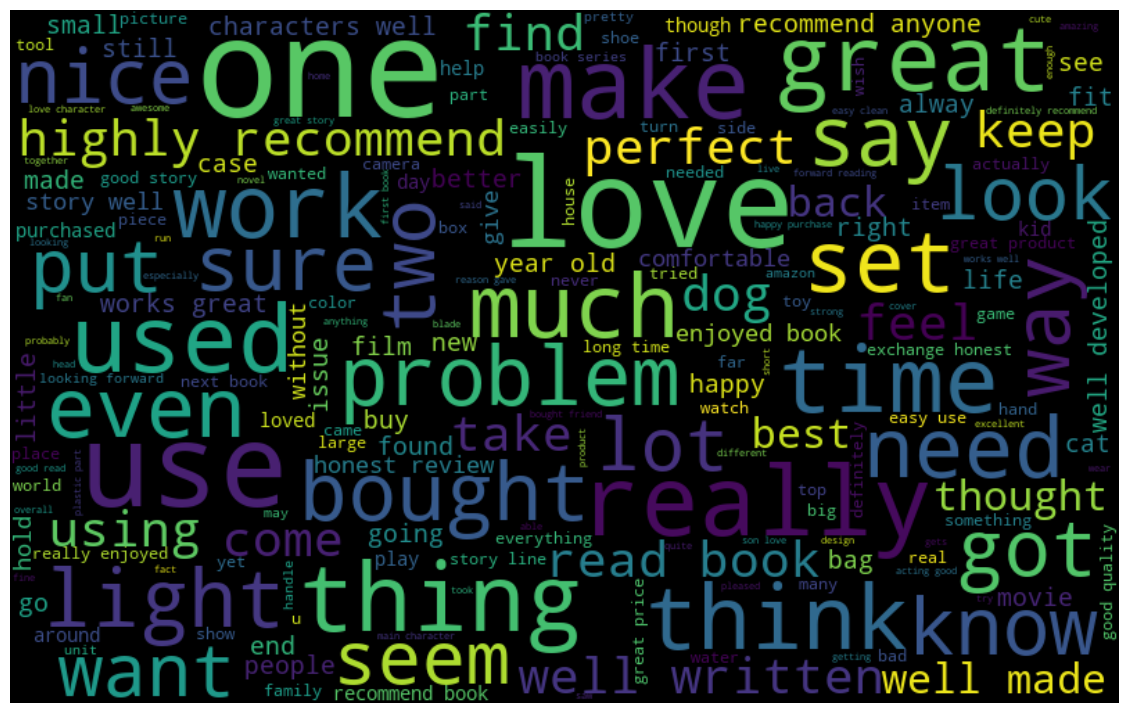

In [10]:
all_words = ''.join([sentence for sentence in df['reviews']])
wordcloud = WordCloud(width = 800,height = 500,random_state = 42,max_font_size = 100).generate(all_words)
plt.figure(figsize = (15,9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

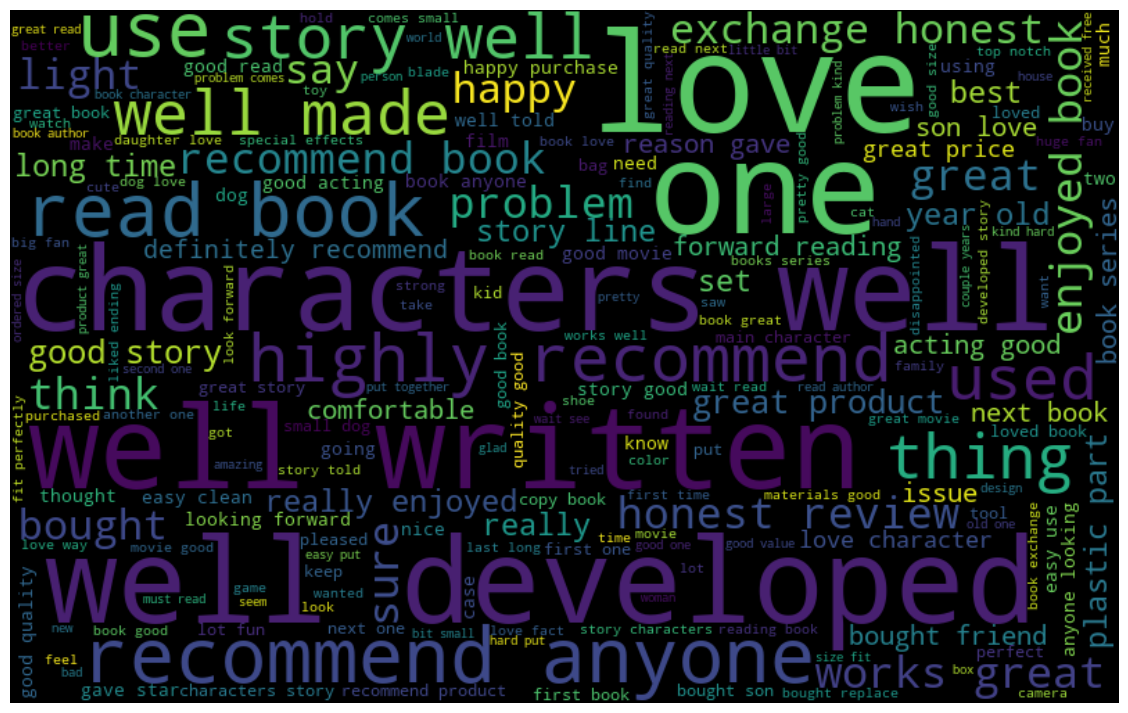

In [11]:
all_words = ''.join([sentence for sentence in df['reviews'][df['label']=='CG']])
wordcloud = WordCloud(width = 800,height = 500,random_state = 42,max_font_size = 100).generate(all_words)
plt.figure(figsize = (15,9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

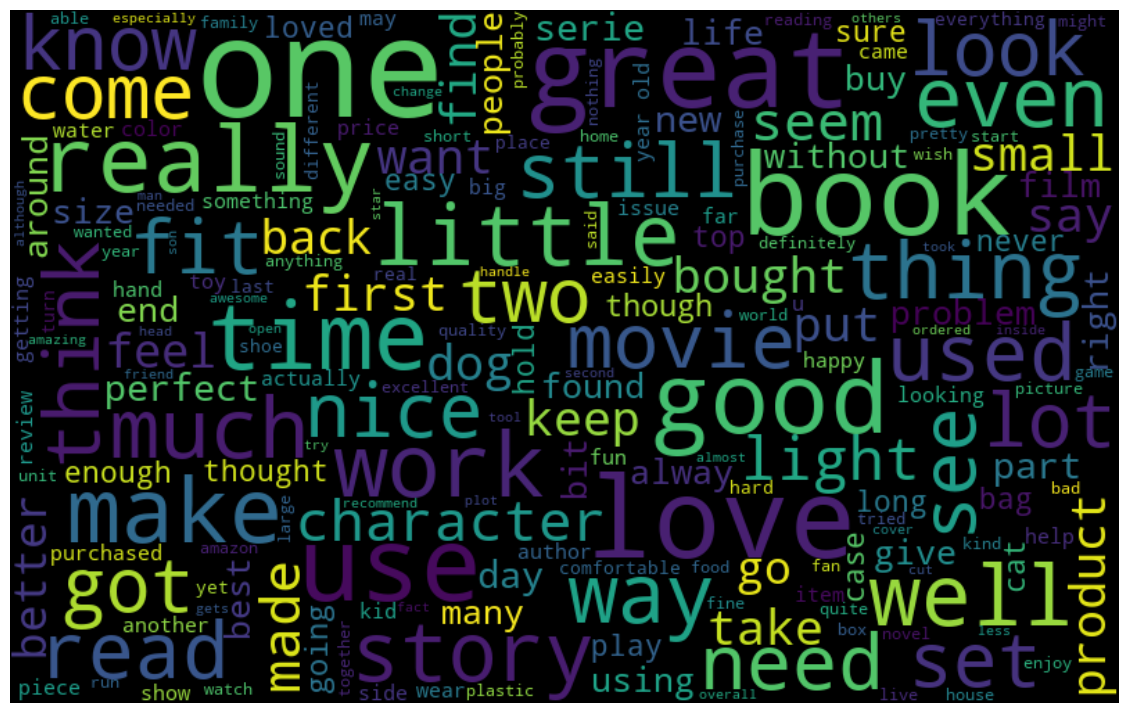

In [12]:
all_words = ''.join([sentence for sentence in df['reviews'][df['label']=='OR']])
wordcloud = WordCloud(width = 800,height = 500,random_state = 42,max_font_size = 100).generate(all_words)
plt.figure(figsize = (15,9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [13]:
!pip install keras

In [14]:
!pip install tensorflow
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences

In [15]:
import tensorflow as tf
from tensorflow import keras

In [17]:
pip install Keras-Preprocessing

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ------------------- -------------------- 20.5/42.6 kB 320.0 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 513.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
from keras import preprocessing

In [21]:
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['reviews'])
word_index = tokenizer.word_index
vocab_size = len(word_index)

In [23]:
vocab_size

43589

In [26]:
sequences = tokenizer.texts_to_sequences(df['reviews'])
padded_seq = pad_sequences(sequences,maxlen = 200,padding ='post', truncating = 'post')

In [65]:
import zipfile
embedding_index = {}
# Open the ZIP file
with zipfile.ZipFile("C:/Users/rajvi/Downloads/glove.6B.100d.txt.zip", 'r') as zip_ref:
    # List all files in the ZIP archive
    zip_file_list = zip_ref.namelist()
    
    # Assuming there's only one file in the ZIP archive
    for zip_file in zip_file_list:
        # Open the file within the ZIP archive
        with zip_ref.open(zip_file, 'r') as file:
            # Read the contents of the file
            for line in file:
                # Decode the line from bytes to a string
                values = line.decode('utf-8', errors='ignore').split()
                print(values)
                word = values[0]
                coefs = np.asarray(values[1:],dtype = 'float32')
                print(len(coefs))
                embedding_index[word] = coefs
                break  # Remove this line if you want to print all lines
            break  # Remove this line if you want to print all files


['the', '-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172', '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459', '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231', '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336', '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971', '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722', '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397', '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531', '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477', '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205', '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167', '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079', '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044', '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972', '0.15006', '-0.53212', '-0.2055', '-1.2526', '0.071624', '0.70565', '0.49744', '-0.42063', '0.26148', '-1.538', '-0.30223

In [66]:
# embedding_matrix = np.zeros((vocab_size+1,100))
# for word,i in word_index.items():
#     embedding_vector = embedding_index.get(word)
#     if embedding_vector != None:
#         embedding_matrix[i] = embedding_vector

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [77]:
import numpy as np
from zipfile import ZipFile

# Load your vocabulary and word_index
# vocab = ... # List of words in your vocabulary
# word_index = ... # Dictionary mapping words to indices

# Load GloVe embeddings
embedding_index = {}
with ZipFile('C:/Users/rajvi/Downloads/glove.6B.100d.txt.zip', 'r') as zip_ref:
    with zip_ref.open('glove.6B.100d.txt', 'r') as f:
        for line in f:
            values = line.decode('utf-8', errors='ignore').split()
            word = values[0]
            embedding_vector = np.asarray(values[1:], dtype='float64')
            embedding_index[word] = embedding_vector

# Create an embedding matrix with the same dimensions as the GloVe embeddings
vocab_size = len(word_index) + 1  # Add 1 for the padding/unknown token
embedding_matrix = np.zeros((vocab_size, 100))

# Fill the embedding matrix with the GloVe embeddings
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Now you can use the embedding_matrix in your model

In [78]:
padded_seq[1]

array([   6,    5,    1, 2084,  383,   46,  614,  112,   93,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(padded_seq, df['label'], test_size=0.20, random_state = 42, stratify=df['label'])

In [81]:
x_train[0]

array([    6,  1611,    83,     4,    34,   107,    38,    59,  3471,
         818,  2077,    16, 17528,    70,   149,   167,    16,    86,
         188,    66,  1152,    83,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [82]:
y_train[0]

'CG'

In [88]:
from keras.layers import LSTM,Dropout,Dense,Embedding,Flatten
from keras import Sequential

model = Sequential([
    Embedding(vocab_size, 100, weights=[embedding_matrix],trainable = False),
    Dropout(0.2),
    # LSTM(128,return_sequences=True),
    LSTM(128),
    Dropout(0.2),
    # Dense(512),
    # Dropout(0.2),
    Dense(256),
    Dense(1,activation='sigmoid')
    
])

In [89]:
embedding_matrix[1]

array([-0.013786 ,  0.38216  ,  0.53236  ,  0.15261  , -0.29694  ,
       -0.20558  , -0.41846  , -0.58437  , -0.77355  , -0.87866  ,
       -0.37858  , -0.18516  , -0.128    , -0.20584  , -0.22925  ,
       -0.42599  ,  0.3725   ,  0.26077  , -1.0702   ,  0.62916  ,
       -0.091469 ,  0.70348  , -0.4973   , -0.77691  ,  0.66045  ,
        0.09465  , -0.44893  ,  0.018917 ,  0.33146  , -0.35022  ,
       -0.35789  ,  0.030313 ,  0.22253  , -0.23236  , -0.19719  ,
       -0.0053125, -0.25848  ,  0.58081  , -0.10705  , -0.17845  ,
       -0.16206  ,  0.087086 ,  0.63029  , -0.76649  ,  0.51619  ,
        0.14073  ,  1.019    , -0.43136  ,  0.46138  , -0.43585  ,
       -0.47568  ,  0.19226  ,  0.36065  ,  0.78987  ,  0.088945 ,
       -2.7814   , -0.15366  ,  0.01015  ,  1.1798   ,  0.15168  ,
       -0.050112 ,  1.2626   , -0.77527  ,  0.36031  ,  0.95761  ,
       -0.11385  ,  0.28035  , -0.02591  ,  0.31246  , -0.15424  ,
        0.3778   , -0.13599  ,  0.2946   , -0.31579  ,  0.4294

In [90]:
model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │       4,359,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,359,000 (16.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,359,000 (16.63 MB)

In [106]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test contain string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now fit the model with the encoded labels
history = model.fit(x_train, y_train_encoded, epochs=2, batch_size=128, validation_data=(x_test, y_test_encoded))

Epoch 1/2
253/253 ━━━━━━━━━━━━━━━━━━━━ 129s 508ms/step - accuracy: 0.9827 - loss: 0.0449 - val_accuracy: 0.9149 - val_loss: 0.3099
Epoch 2/2
253/253 ━━━━━━━━━━━━━━━━━━━━ 130s 513ms/step - accuracy: 0.9836 - loss: 0.0453 - val_accuracy: 0.9139 - val_loss: 0.2999


In [96]:
# history = model.fit(x_train,y_train,epochs =10,batch_size=128,validation_data=[x_test,y_test])

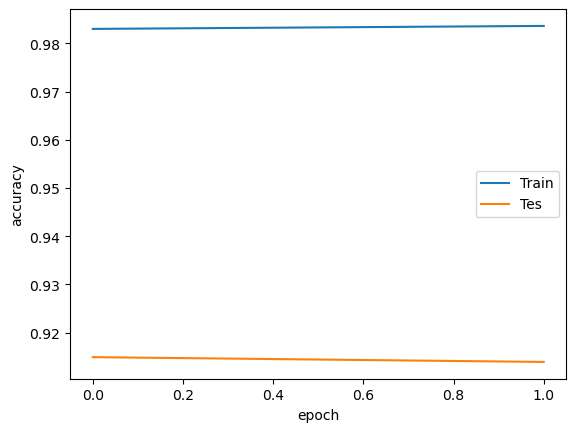

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Tes'])
plt.show()